- Multiple Linear Regression uses two or more variables to make predictions about another variable:
- Multiple linear regression uses a set of independent variables and a dependent variable. It uses these variables to learn how to find optimal parameters. It takes a labeled dataset and learns from it. Once we confirm that it’s learned correctly, we can then use it to make predictions by plugging in new x values.
- We can use scikit-learn’s LinearRegression() to perform multiple linear regression.
- Residual Analysis is used to evaluate the regression model’s accuracy. In other words, it’s used to see if the model has learned the coefficients correctly.
- Scikit-learn’s linear_model.LinearRegression comes with a .score() method that returns the coefficient of determination R² of the prediction. The best score is 1.0.

## Training Set vs. Test Set
As with most machine learning algorithms, we have to split our dataset into:

Training set: the data used to fit the model

Test set: the data partitioned away at the very start of the experiment (to provide an unbiased evaluation of the model)

In general, putting 80% of your data in the training set and 20% of your data in the test set is a good place to start.



In [16]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

mlr = LinearRegression()

model=mlr.fit(x_train, y_train)

y_predict = mlr.predict(x_test)


Highly positive or negative coefficients indicate a higher correlation

In [17]:
print(mlr.coef_)

[[-302.73009383 1199.3859951     4.79976742  -24.28993151   24.19824177
    -7.58272473 -140.90664773   48.85017415  191.4257324  -151.11453388
    89.408889    -57.89714551  -19.31948556  -38.92369828]]


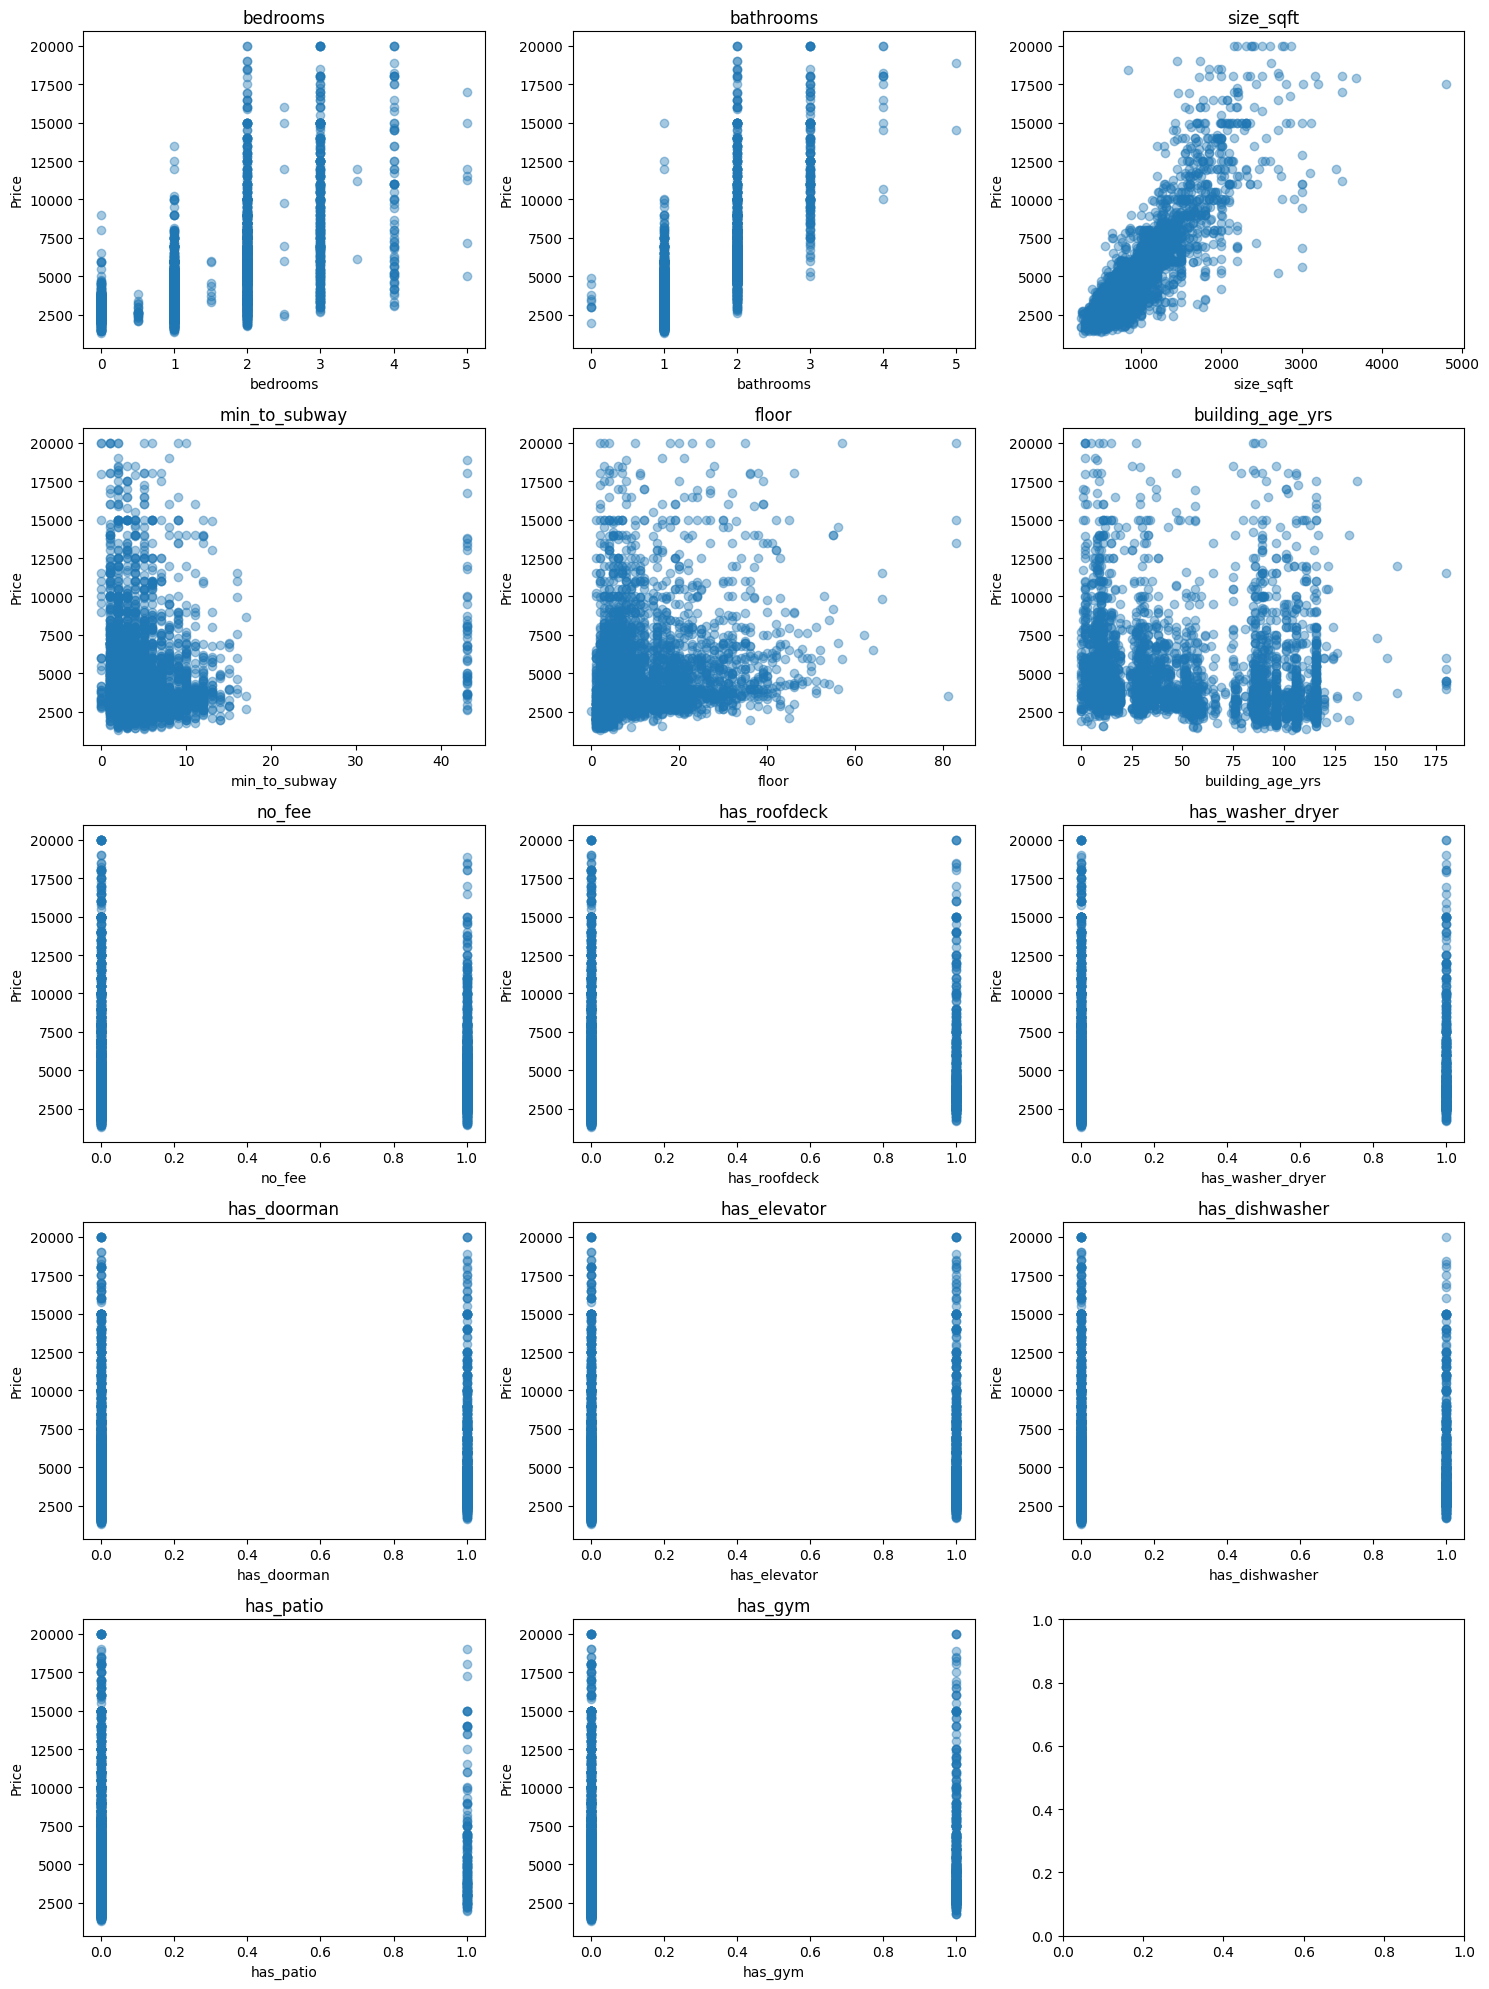

<Figure size 640x480 with 0 Axes>

In [18]:
fig, axs = plt.subplots(5, 3, figsize=(15, 20))
axs = axs.ravel()

for i, value in enumerate(x.columns):
    axs[i].scatter(df[[value]], df[['rent']], alpha=0.4)
    axs[i].set_title(str(value))
    axs[i].set_xlabel(value)
    axs[i].set_ylabel("Price")

plt.tight_layout()
plt.show()
plt.clf()




Train score:
0.7725460559817883
Test score:
0.8050371975357573


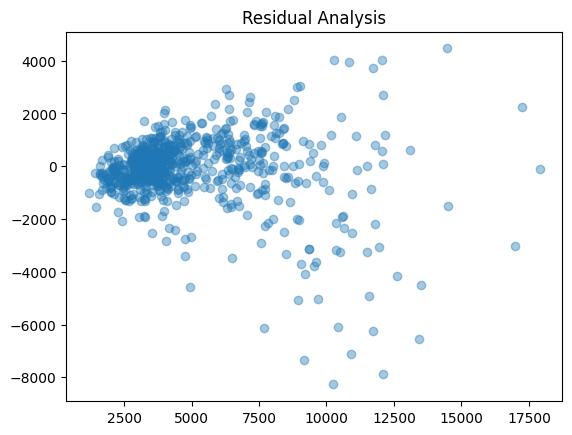

In [19]:
print("Train score:")
print(mlr.score(x_train, y_train))

print("Test score:")
print(mlr.score(x_test, y_test))

# Difference between training and test data sets. Helps us understand how accurate model is 
residuals = y_predict - y_test

plt.scatter(y_predict, residuals, alpha=0.4)
plt.title('Residual Analysis')
plt.show()